In [574]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt



# Mostrar todas las filas y columnas en outputs
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_excel("datos_tarea25.xlsx")


In [575]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [576]:
from Pyurification import Pyurification

pyrf = Pyurification(df)


atributos = {
    k: v for k, v in pyrf.__dict__.items()
    if not isinstance(v, (pd.DataFrame, pd.Series))
}


for k, v in atributos.items():
    print(f"Atributo = {k}:{v}")
    print("")


c:\Users\Usuario\Desktop\Ejercicios de uni\Machine learning tarea 1\Pyurification.py:116: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.replace({val_unicos[0]:0, val_unicos[1]:1})


Atributo = len:4340

Atributo = uniques:{'Price': 915, 'Levy': 203, 'Manufacturer': 4, 'Prod. year': 29, 'Category': 3, 'Leather interior': 2, 'Fuel type': 3, 'Engine volume': 58, 'Mileage': 1826, 'Cylinders': 10, 'Gear box type': 2, 'Drive wheels': 3, 'Wheel': 2, 'Color': 2, 'Airbags': 16}

Atributo = cols:Index(['Price', 'Levy', 'Manufacturer', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

Atributo = umbral_cat:0.05

Atributo = posible_null_values:defaultdict(<class 'set'>, {'Price': set(), 'Mileage': {'39138 km', '161518 km', '124893 km', '84882 km', '37000 km', '230400 km', '107106 km', '147431 km', '63655 km', '26918 km', '155976 km', '161600 km', '74900 km', '32329 km', '193000 km', '71234 km', '86000 km', '25600 km', '64341 km', '140000 km', '116082 km', '274771 km', '240560 km', '105909 km', '93000 km', '143000 km', '16

In [577]:
df.describe()

,Price,Prod. year,Leather interior,Cylinders,Gear box type,Wheel,Color,Airbags
count,4340.000000,4340.00000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,19161.052765,2012.84977,0.873041,4.916129,0.149539,0.022350,0.463825,7.884101
std,23990.524855,3.59624,0.332965,1.429085,0.356660,0.147837,0.498747,4.600287
min,3.000000,1943.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1725.000000,2011.00000,1.000000,4.000000,0.000000,0.000000,0.000000,4.000000
50%,14113.000000,2013.00000,1.000000,4.000000,0.000000,0.000000,0.000000,10.000000
75%,27065.000000,2015.00000,1.000000,6.000000,0.000000,0.000000,1.000000,12.000000
max,627220.000000,2020.00000,1.000000,12.000000,1.000000,1.000000,1.000000,16.000000


In [578]:
pyrf.show_col_types()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
Tipo,Numeríca,Categoríca,Categoríca,Categoríca,Categoríca,Dicotomica,Categoríca,Categoríca,Numeríca,Categoríca,Dicotomica,Categoríca,Dicotomica,Dicotomica,Categoríca
Tipo asignado por pandas,int64,object,object,int64,object,int64,object,object,object,int64,int64,object,int64,int64,int64
Valores unicos,915,203,4,29,3,2,3,58,1826,10,2,3,2,2,16
Posibles errores,None,None,None,None,None,None,None,None,1826 valores distintos a un numerico. Recomiendo revisión de tipo de variable,None,None,None,None,None,None


In [579]:
pyrf.col_cat

['Levy',
 'Manufacturer',
 'Prod. year',
 'Category',
 'Fuel type',
 'Engine volume',
 'Cylinders',
 'Drive wheels',
 'Airbags']

In [580]:
pyrf.change_to_num(["Levy", "Prod. year", "Engine volume", "Airbags"])

In [581]:
pyrf.show_frecuencys()

n         %
Manufacturer TOYOTA         1547  0.356452
             HYUNDAI        1234  0.284332
             MERCEDES-BENZ   932  0.214747
             LEXUS           627  0.144470
Category     Sedan          2317  0.533871
             Jeep           1510  0.347926
             Hatchback       513  0.118203
Fuel type    Petrol         2172  0.500461
             Hybrid         1248  0.287558
             Diesel          920  0.211982
Cylinders    4              2852  0.657143
             6               964  0.222120
             8               487  0.112212
             12               12  0.002765
             5                12  0.002765
             3                 6  0.001382
             2                 4  0.000922
             1                 1  0.000230
             7                 1  0.000230
             10                1  0.000230
Drive wheels Front          2692  0.620276
             4x4            1175  0.270737
             Rear            473  0.108986

In [582]:
pyrf.show_col_types()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
Tipo,Numeríca,Numeríca,Categoríca,Numeríca,Categoríca,Dicotomica,Categoríca,Numeríca,Numeríca,Categoríca,Dicotomica,Categoríca,Dicotomica,Dicotomica,Numeríca
Tipo asignado por pandas,int64,object,object,int64,object,int64,object,object,object,int64,int64,object,int64,int64,int64
Valores unicos,915,203,4,29,3,2,3,58,1826,10,2,3,2,2,16
Posibles errores,None,{-},None,None,None,None,None,20 valores distintos a un numerico. Recomiendo revisión de tipo de variable,1826 valores distintos a un numerico. Recomiendo revisión de tipo de variable,None,None,None,None,None,None


In [583]:
pyrf.remove_string_from_num("Mileage")


In [584]:
pyrf.create_and_remove_string_from_num("Engine volume")


In [585]:
pyrf.cols

Index(['Price', 'Levy', 'Manufacturer', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags', 'Turbo'],
      dtype='object')

In [586]:
pyrf.show_col_types()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo
Tipo,Numeríca,Numeríca,Categoríca,Numeríca,Categoríca,Dicotomica,Categoríca,Numeríca,Numeríca,Categoríca,Dicotomica,Categoríca,Dicotomica,Dicotomica,Numeríca,Dicotomica
Tipo asignado por pandas,int64,object,object,int64,object,int64,object,float64,int64,int64,int64,object,int64,int64,int64,int32
Valores unicos,915,203,4,29,3,2,3,40,1826,10,2,3,2,2,16,2
Posibles errores,None,{-},None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [587]:
pyrf.posible_null_values["Engine volume"]

set()

In [588]:
pyrf.change_value_in_col("Levy", ["-"], changed_values=0)
pyrf.df["Levy"]

0         891
1         761
2         394
3        1053
4        1055
5         891
6        1079
7         810
8        1850
9        1249
10          0
11       2455
12          0
13       1750
14        382
15       1017
16          0
17       1017
18          0
19        779
20        645
21       1053
22       2455
23       1324
24        830
25        781
26        531
27        639
28       1604
29        891
30        687
31      11714
32        836
33        779
34       1537
35        781
36       1811
37       1646
38          0
39       1017
40        609
41        394
42        690
43       1079
44        308
45        531
46        836
47        751
48        765
49        645
50        639
51          0
52        831
53       1249
54        836
55       1017
56          0
57        831
58       1053
59        779
60        879
61       1342
62       1017
63       1598
64        765
65       1514
66       1935
67       1077
68       1055
69       1017
70          0
71    

In [589]:
pyrf.onehotencoder(["Manufacturer", "Category", "Fuel type", "Drive wheels"])


In [590]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, DecisionTreeRegressor

In [591]:
X = pyrf.df


y = X["Color"]
X.drop(columns="Color", inplace=True)
print(X.columns)


Index(['Price', 'Levy', 'Prod. year', 'Leather interior', 'Engine volume',
       'Mileage', 'Cylinders', 'Gear box type', 'Wheel', 'Airbags', 'Turbo',
       'Manufacturer_LEXUS', 'Manufacturer_MERCEDES-BENZ',
       'Manufacturer_TOYOTA', 'Category_Jeep', 'Category_Sedan',
       'Fuel type_Hybrid', 'Fuel type_Petrol', 'Drive wheels_Front',
       'Drive wheels_Rear'],
      dtype='object')


In [592]:
# min_sample_split: el numero minimo de casos que contiene una hoja para ser creada
# criterion: Criterio de division: "gini", "entropy", "log_loss"
# max_depth: Profundidad maxima del arbol. En caso de no especificar, el clasificador sigue segmentando hasta que las hojas son puras, o se alcanza el min_sample_split.
tree = DecisionTreeClassifier(criterion="entropy",
                              max_depth=10,
                              random_state=777)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)
# Antes de construir el modelo, es importante verificar que la distribucion de clases es similar en train y test
print(f"La frecuencia de cada clase en train es: \n{y_train.value_counts(normalize=True)}")
print(f"La frecuencia de cada clase en test es: \n{y_test.value_counts(normalize=True)}")

La frecuencia de cada clase en train es: 
Color
0    0.531394
1    0.468606
Name: proportion, dtype: float64
La frecuencia de cada clase en test es: 
Color
0    0.5553
1    0.4447
Name: proportion, dtype: float64


In [594]:
# Construimos el modelo.
tree.fit(X_train, y_train)

# Conocer los niveles de la variable a predecir
print(tree.classes_)
# Conocer le nombre de las variables predictoras
print(tree.feature_names_in_)
# Obtener informacion detallada de cada node y las reglas de decision
tree_rules = export_text(tree, feature_names=list(X.columns), show_weights=True)
print(tree_rules)


[0 1]
['Price' 'Levy' 'Prod. year' 'Leather interior' 'Engine volume' 'Mileage'
 'Cylinders' 'Gear box type' 'Wheel' 'Airbags' 'Turbo'
 'Manufacturer_LEXUS' 'Manufacturer_MERCEDES-BENZ' 'Manufacturer_TOYOTA'
 'Category_Jeep' 'Category_Sedan' 'Fuel type_Hybrid' 'Fuel type_Petrol'
 'Drive wheels_Front' 'Drive wheels_Rear']
|--- Engine volume <= 2.30
|   |--- Manufacturer_MERCEDES-BENZ <= 0.50
|   |   |--- Fuel type_Petrol <= 0.50
|   |   |   |--- Mileage <= 52351.50
|   |   |   |   |--- Prod. year <= 2017.50
|   |   |   |   |   |--- Prod. year <= 2011.50
|   |   |   |   |   |   |--- Price <= 10636.00
|   |   |   |   |   |   |   |--- weights: [0.00, 12.00] class: 1
|   |   |   |   |   |   |--- Price >  10636.00
|   |   |   |   |   |   |   |--- Price <= 14609.50
|   |   |   |   |   |   |   |   |--- Price <= 11682.00
|   |   |   |   |   |   |   |   |   |--- Mileage <= 38000.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |--

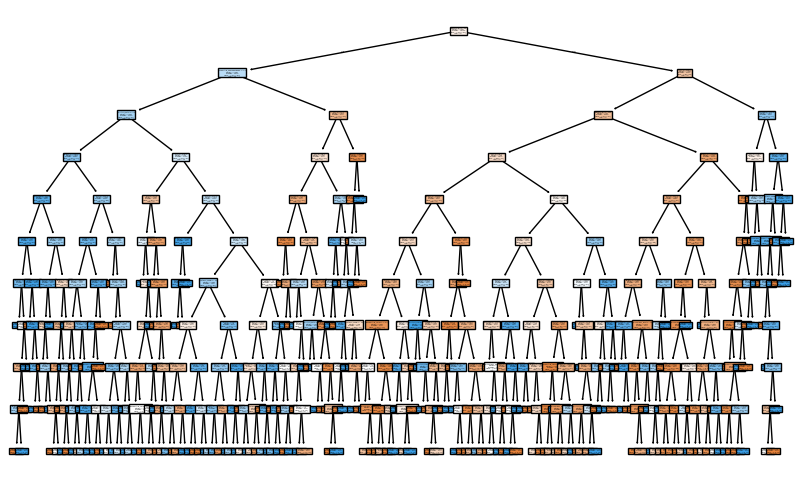

In [595]:
plt.figure(figsize=(10,6))
plot_tree(tree,
          feature_names=X.columns.tolist(),
          class_names=["No", "Yes"],
          filled=True,
          proportion=True)
plt.show()

In [596]:
# Se estudia la importancia (o valor predicitivo) de cada variable en el modelo.
print(pd.DataFrame({"nombre":tree.feature_names_in_, "importancia":tree.feature_importances_}))

                        nombre  importancia
0                        Price     0.255474
1                         Levy     0.143686
2                   Prod. year     0.072657
3             Leather interior     0.000821
4                Engine volume     0.141542
5                      Mileage     0.210259
6                    Cylinders     0.005006
7                Gear box type     0.002436
8                        Wheel     0.001840
9                      Airbags     0.028069
10                       Turbo     0.003948
11          Manufacturer_LEXUS     0.011830
12  Manufacturer_MERCEDES-BENZ     0.027222
13         Manufacturer_TOYOTA     0.008648
14               Category_Jeep     0.001416
15              Category_Sedan     0.017599
16            Fuel type_Hybrid     0.012443
17            Fuel type_Petrol     0.024914
18          Drive wheels_Front     0.024003
19           Drive wheels_Rear     0.006187


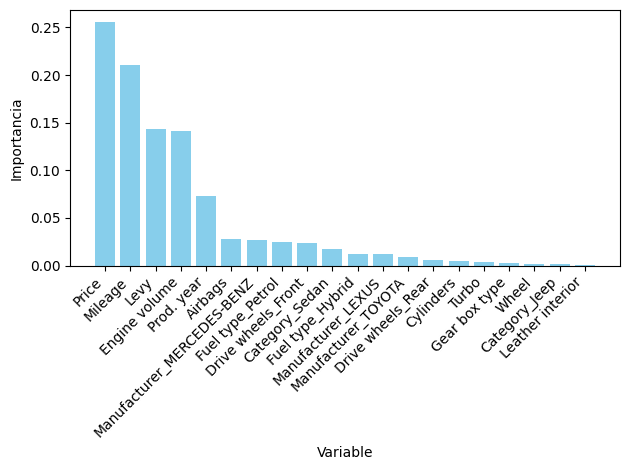

In [597]:
# Ordenamos el DataFrame por importancia en orden descendente
df_importancia = pd.DataFrame({"Variable":tree.feature_names_in_, "Importancia":tree.feature_importances_}).sort_values(by="Importancia", ascending=False)

# Creamos el grafico de barras
plt.bar(df_importancia["Variable"], df_importancia["Importancia"], color="skyblue")
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

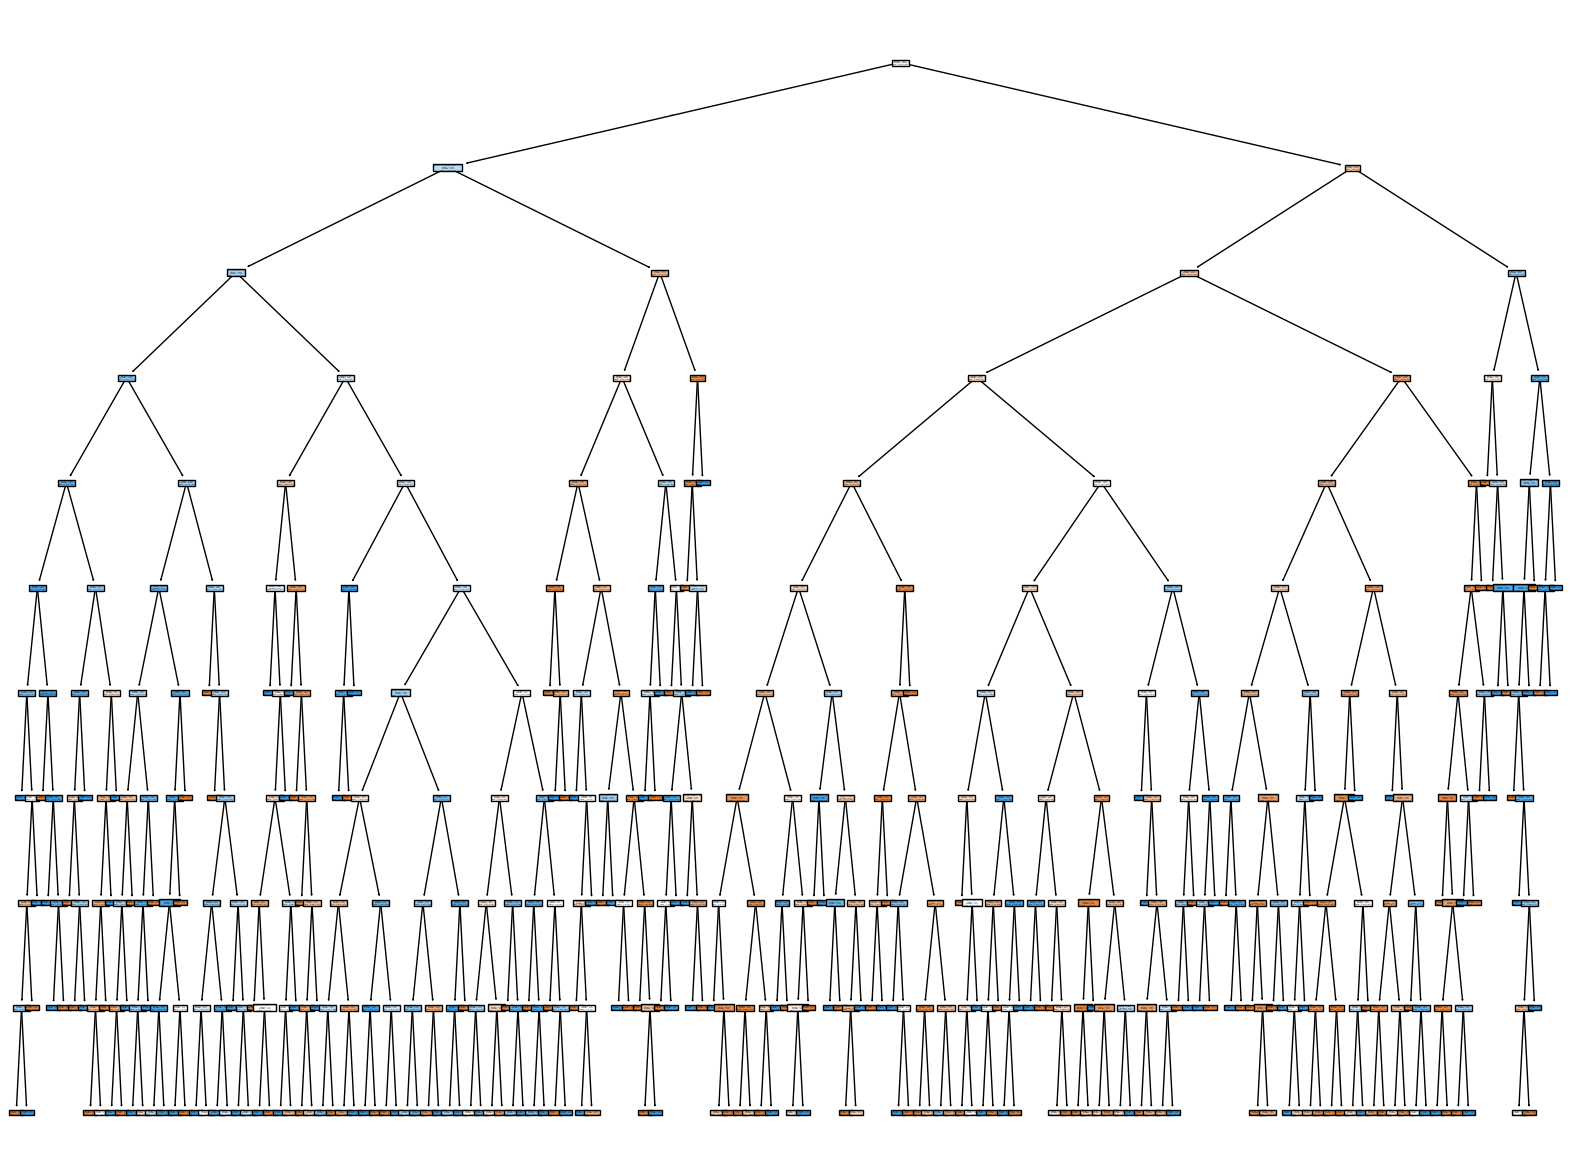

In [598]:
# Creamos el arbol
plt.figure(figsize=(20,15))
plot_tree(tree, feature_names=X.columns.tolist(), filled=True, proportion=True)
plt.show()

In [599]:
# Tuneo y evaluacion predictiva del modelo para variable dependiente categorica
params={
    "max_depth":[2, 3, 5, 10, 20],
    "min_samples_split":[5, 10, 20, 50, 100],
    "criterion": ["gini", "entropy"]
}
scoring_metrics = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

In [601]:
#Cross Validation
decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=decision_tree,
                           param_grid=params,
                           cv=4,
                           scoring=scoring_metrics,
                           refit="accuracy")
grid_search.fit(X_train, y_train)


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             refit='accuracy',
             scoring=['accuracy', 'precision_macro', 'recall_macro',
                      'f1_macro'])

In [610]:

# Obtenemos los resultados del grid search.
result = pd.DataFrame(grid_search.cv_results_)

result.sort_values(by="mean_test_accuracy", ascending=False, inplace=True)
result[["params", "mean_test_accuracy", "mean_test_accuracy", "mean_test_precision_macro", "mean_test_recall_macro", "mean_test_f1_macro"]]


,params,mean_test_accuracy,mean_test_accuracy,mean_test_precision_macro,mean_test_recall_macro,mean_test_f1_macro
45,"{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}",0.751152,0.751152,0.751105,0.749390,0.749614
21,"{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 10}",0.746832,0.746832,0.746703,0.744782,0.745051
15,"{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}",0.746256,0.746256,0.745473,0.744566,0.744815
20,"{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5}",0.745968,0.745968,0.745516,0.743573,0.744108
40,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}",0.742800,0.742800,0.742405,0.741519,0.741440
46,"{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 10}",0.742224,0.742224,0.742217,0.740439,0.740563
42,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 20}",0.740207,0.740207,0.739893,0.738643,0.738610
41,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}",0.740207,0.740207,0.739971,0.738713,0.738662
16,"{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}",0.739055,0.739055,0.738344,0.737495,0.737618
47,"{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 20}",0.738479,0.738479,0.738450,0.736446,0.736713


In [615]:

#Obtenemos el mejor modelo
best_model = grid_search.best_estimator_
print(best_model)

# Para seleccionar una parametrización especifica y la mejor de acuerdo con el criterio de GridSearch, acceder a esta y conocer su combinación
result.iloc[0].params

res_1=result[["split0_test_accuracy", "split1_test_accuracy", "split2_test_accuracy", "split3_test_accuracy",]].iloc[0]
res_2=result[["split0_test_accuracy", "split1_test_accuracy", "split2_test_accuracy", "split3_test_accuracy",]].iloc[1]
res_3=result[["split0_test_accuracy", "split1_test_accuracy", "split2_test_accuracy", "split3_test_accuracy",]].iloc[2]


DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5)


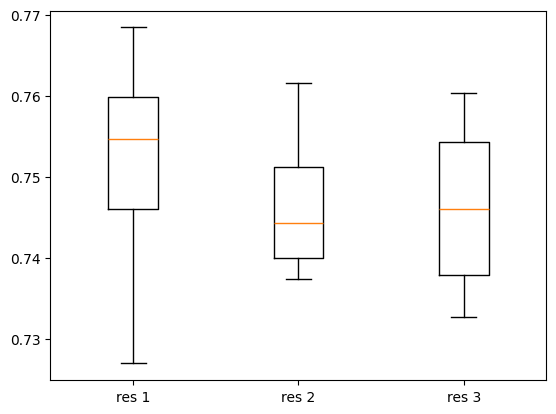

In [616]:

# Creamos una boxplot para los valores de accuracy
# Es importante recordar que los boxplots con gran amplitud son malos porque no tiene robustez
plt.boxplot([res_1.values, res_2.values, res_3.values], labels=["res 1", "res 2", "res 3"])
plt.show()




In [617]:

#---------------------------------
# Empezamos a predecir
best_model = grid_search.best_estimator_ # Aqui ponemos el que pensemos que es el mejor
best_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5)

In [618]:

# Predicciones en train y test
y_train_predict = best_model.predict(X_train)
y_test_predict = best_model.predict(X_test)

# Medidas de bondad de ajuste en train
conf_matrix = confusion_matrix(y_train, y_train_predict)
print(conf_matrix)
print("Medidas de desempeño")
print(classification_report(y_train, y_train_predict))



[[1744  101]
 [  67 1560]]
Medidas de desempeño
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1845
           1       0.94      0.96      0.95      1627

    accuracy                           0.95      3472
   macro avg       0.95      0.95      0.95      3472
weighted avg       0.95      0.95      0.95      3472



Area bajo la curva ROC 0.99


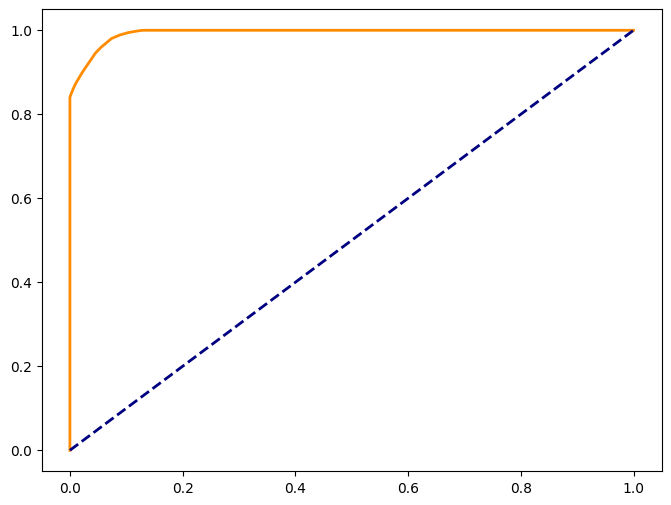

In [ ]:

# Curvas ROC
y_train_auc = pd.get_dummies(y_train, drop_first=True)

# Calcular el area bajo la curva ROC
y_prob_train = best_model.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train_auc, y_prob_train)
roc_auc = (auc(fpr, tpr))
print(f"Area bajo la curva ROC {roc_auc:.2f}")

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0,1], color="navy", lw=2, linestyle="--")
plt.show()
